In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(178)

In [2]:
csv_file_names = ['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
                  'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
                  'Friday-WorkingHours-Morning.pcap_ISCX.csv',
                  'Monday-WorkingHours.pcap_ISCX.csv',
                  'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
                  'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
                  'Tuesday-WorkingHours.pcap_ISCX.csv',
                  'Wednesday-workingHours.pcap_ISCX.csv']
dfs = []
for file_name in csv_file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [3]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [6]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [7]:
df[' Label'].nunique()

15

### Data Cleaning

In [8]:

from itertools import combinations

def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)
    
    num=df._get_numeric_data()
    num[num<0]=0
    
    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)
    
    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)
    
    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)
    
    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)

Dataset Shape:  (2830743, 79)
Zero Variance Columns:  ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']  are dropped!!
Shape after removing the zero variance columns:  (2830743, 71)
2867 rows dropped
Shape after Removing NaN:  (2827876, 71)
Shape after dropping duplicates:  (2520798, 71)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd URG Flags', 'CWE Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1')]  dropped!
Shape after removing identical value columns:  (2520798, 66)


In [9]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',

In [10]:
df['Label'].value_counts()

BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

<IPython.core.display.Javascript object>

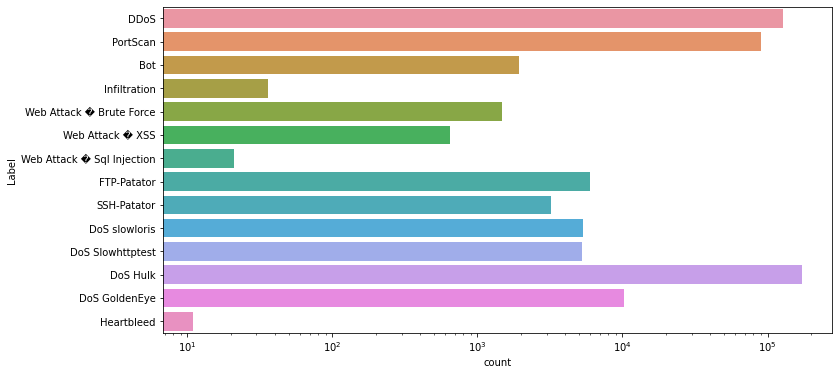

In [11]:
plt.figure(figsize=(12,6))
plot=sns.countplot(data=df['Label'],y=df['Label'].loc[df['Label']!='BENIGN'])
plt.xscale('log')
fig=plot.get_figure()
fig.savefig('img1.png')

### Data Normalization

In [12]:
X = df.drop('Label', axis=1)
y = df['Label']

# Min-Max scaling for features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# One-hot encoding for the label
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
y_encoded = pd.DataFrame(y_encoded)
#, columns=encoder.get_feature_names_out(['Label'])

C:\Users\aryan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
X_scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.837186,2.500000e-08,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000005,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840070,9.083333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840085,4.333333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705516,2.833333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837156,2.500000e-08,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000005,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,0.000809,2.684583e-04,0.000014,0.000007,8.682171e-06,2.319007e-07,0.001128,0.012043,0.004713,0.000000,...,0.000014,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520794,0.000809,2.700000e-06,0.000005,0.000007,6.511628e-06,5.522898e-07,0.001692,0.018065,0.007070,0.000000,...,0.000005,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520795,0.885481,6.833333e-07,0.000005,0.000003,2.403101e-06,9.153974e-09,0.001249,0.000000,0.002609,0.003076,...,0.000000,0.231884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520796,0.000809,8.738625e-03,0.000023,0.000007,1.488372e-05,3.905696e-07,0.001289,0.013763,0.005386,0.000000,...,0.000023,0.144928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Combine the scaled features and the one-hot encoded label
df = pd.concat([X_scaled, y_encoded], axis=1)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,5,6,7,8,9,10,11,12,13,14
0,0.837186,2.500000e-08,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840070,9.083333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840085,4.333333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705516,2.833333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837156,2.500000e-08,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,0.000809,2.684583e-04,0.000014,0.000007,8.682171e-06,2.319007e-07,0.001128,0.012043,0.004713,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520794,0.000809,2.700000e-06,0.000005,0.000007,6.511628e-06,5.522898e-07,0.001692,0.018065,0.007070,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520795,0.885481,6.833333e-07,0.000005,0.000003,2.403101e-06,9.153974e-09,0.001249,0.000000,0.002609,0.003076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2520796,0.000809,8.738625e-03,0.000023,0.000007,1.488372e-05,3.905696e-07,0.001289,0.013763,0.005386,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_encoded,test_size=0.2)
print(X_train.shape," ",X_test.shape)
print(y_train.shape," ",y_test.shape)

(2016638, 65)   (504160, 65)
(2016638, 15)   (504160, 15)


In [17]:
X_train

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2474197,0.762509,2.166667e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.144928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2255382,0.000809,1.966333e-04,0.000005,0.000007,1.085271e-05,4.638013e-07,0.002820,0.030108,0.011783,0.000000,...,0.000005,0.231884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2042818,0.001221,7.143127e-01,0.000041,0.000017,8.139535e-05,1.769005e-05,0.014102,0.000000,0.017674,0.023727,...,0.000014,0.231884,0.000009,0.000000,0.000009,0.000009,0.709167,0.000000,0.709167,0.709167
1768384,0.000809,1.850000e-06,0.000005,0.000007,5.116279e-06,6.865481e-07,0.001330,0.014194,0.005555,0.000000,...,0.000005,0.231884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2064616,0.001221,7.096012e-01,0.000027,0.000021,2.589147e-05,1.769005e-05,0.013215,0.000000,0.008032,0.017348,...,0.000009,0.144928,0.000009,0.000000,0.000009,0.000009,0.708333,0.000000,0.708333,0.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492686,0.745113,2.500000e-08,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000005,0.144928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
153708,0.000809,1.483333e-06,0.000005,0.000007,5.426357e-06,1.556176e-07,0.001410,0.015054,0.005891,0.000000,...,0.000005,0.144928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2329820,0.006760,5.450146e-01,0.000059,0.000048,7.193798e-05,6.345230e-06,0.022119,0.000000,0.011158,0.021082,...,0.000061,0.144928,0.001342,0.001974,0.004061,0.000792,0.083271,0.000241,0.083333,0.082956
1177091,0.001221,1.701720e-01,0.000027,0.000021,7.992248e-05,8.238577e-07,0.024456,0.000000,0.024792,0.036071,...,0.000009,0.231884,0.003862,0.000000,0.003862,0.003862,0.083300,0.000000,0.083300,0.083300


In [18]:
X_test

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
427252,0.000809,8.116333e-04,0.000005,0.000007,5.426357e-06,3.539537e-07,0.001410,0.015054,0.005891,0.000000,...,0.000005,0.231884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1079256,0.766873,4.083333e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.144928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1322875,0.001221,9.896712e-01,0.000086,0.000055,1.016279e-04,3.643282e-06,0.017607,0.000000,0.011034,0.022467,...,0.000014,0.231884,0.002976,0.013081,0.029581,0.000313,0.085000,0.000753,0.085000,0.083333
1698108,0.001221,9.209523e-02,0.000027,0.000027,2.542636e-04,1.771294e-06,0.067647,0.000000,0.078873,0.112302,...,0.000014,0.144928,0.008908,0.000000,0.008908,0.008908,0.083333,0.000000,0.083333,0.083333
776138,0.792599,2.500000e-08,0.000005,0.000000,2.868217e-06,0.000000e+00,0.001491,0.000000,0.003114,0.003672,...,0.000000,0.231884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967838,0.001221,8.804805e-01,0.000068,0.000010,1.969767e-04,9.153974e-09,0.009307,0.000000,0.026732,0.015519,...,0.000052,0.231884,0.042815,0.089752,0.085624,0.000005,0.160000,0.244473,0.427500,0.048607
981917,0.716075,1.416667e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.231884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2262780,0.000809,2.557250e-04,0.000000,0.000003,3.333333e-06,1.083220e-07,0.001732,0.018495,0.007238,0.000000,...,0.000000,0.144928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1326138,0.000809,2.300608e-03,0.000005,0.000007,4.961240e-06,1.464636e-07,0.001289,0.013763,0.005386,0.000000,...,0.000005,0.231884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
y_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2474197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255382,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2042818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768384,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064616,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2329820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
427252,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079256,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1322875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1698108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967838,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981917,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2262780,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1326138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#selecting 1% of random rows for better running time

X_train = X_train.sample(frac=0.1, replace=True, random_state=1)
y_train = y_train.sample(frac=0.1, replace=True, random_state=1)
X_test = X_test.sample(frac=0.1, replace=True, random_state=1)
y_test = y_test.sample(frac=0.1, replace=True, random_state=1)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(201664, 65) (201664, 15)
(50416, 65) (50416, 15)


### Feature extraction using Random Forest

In [22]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

X_train.columns

features = X_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

Index(['Destination Port', 'Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Std',
       'Fwd Header Length', 'Bwd Header Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'PSH Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size',
       'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'act_data_pkt_fwd'],
      dtype='object')
22
[2.13720847e-02 7.46880066e-03 2.13889850e-02 8.61921406e-03
 4.36280217e-02 3.46129005e-03 2.48654336e-02 4.30286930e-03
 2.39316495e-02 1.01872513e-02 2.85832249e-02 6.74460200e-03
 4.16785154e-02 8.42577090e-02 6.79396178e-03 4.85239923e-03
 8.49575365e-03 8.94543606e-03 1.73836629e-02 3.02005009e-03
 1.45865315e-02 1.07151443e-02 2.03543302e-02 9.98583869e-03
 6.85736720e-03 3.21637922e-03 2.79481031e-03 2.73768767e-03

### Random Forest 

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,f1_score,precision_score,recall_score
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [26]:
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9980363376705808
Precision:  0.997999877124335


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall:  0.9980363376705808
F1 score:  0.9979610861890423


### Decision Tree

In [27]:
def run_decisionTree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [28]:
run_decisionTree(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9971239289114566
Precision:  0.9972376337136272
Recall:  0.9971239289114566
F1 score:  0.9971603345812831


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Extreme-Gradient Boosting(XGBoost)

In [29]:
def run_XGBoost(X_train, X_test, y_train, y_test):
    clf = xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [30]:
run_XGBoost(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9975206283719454


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.9977293625682443
Recall:  0.9980561726436052
F1 score:  0.9978286088342615


### Cat Boost

In [31]:
def run_catBoost(X_train, X_test, y_train, y_test):
    y_train_labels = y_train.idxmax(axis=1)
    y_test_labels = y_test.idxmax(axis=1)
    clf = CatBoostClassifier(iterations=100, random_state=0, verbose=0)
    clf.fit(X_train, y_train_labels, cat_features=[], verbose=0)
    y_pred_labels = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test_labels, y_pred_labels))
    print('Precision: ', precision_score(y_test_labels, y_pred_labels, average='weighted'))
    print('Recall: ', recall_score(y_test_labels, y_pred_labels, average='weighted'))
    print('F1 score: ', f1_score(y_test_labels, y_pred_labels, average='weighted'))

In [32]:
run_catBoost(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9955966359885751
Precision:  0.9952129074069275
Recall:  0.9955966359885751
F1 score:  0.9953735007514036


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


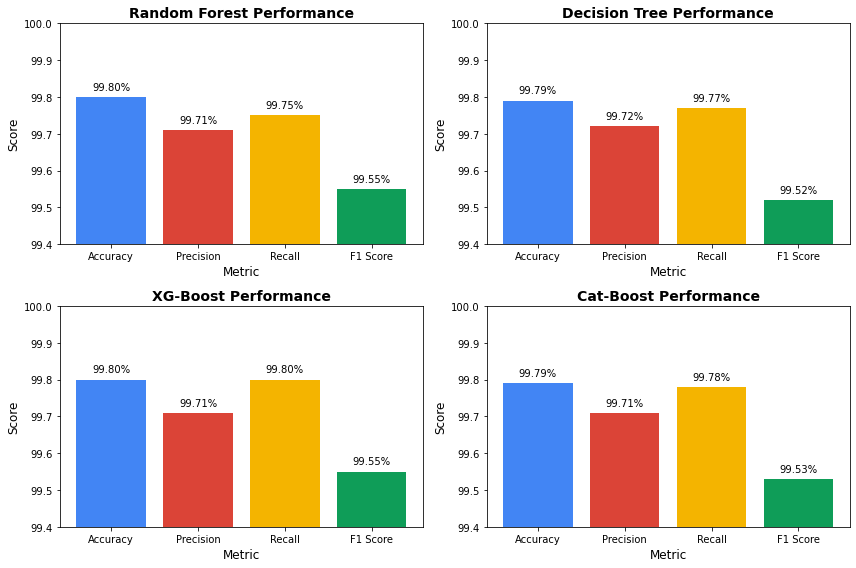

In [37]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Decision Tree', 'XG-Boost', 'Cat-Boost']
accuracy = [99.80, 99.71, 99.75, 99.55]
precision = [99.79, 99.72, 99.77, 99.52]
recall = [99.8, 99.71, 99.8, 99.55]
f1_score = [99.79, 99.71, 99.78, 99.53]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, (model, ax) in enumerate(zip(models, axs)):
    ax.bar(metrics, values[i], color=['#4285F4', '#DB4437', '#F4B400', '#0F9D58'])
    ax.set_title(f'{model} Performance', fontsize=14, fontweight='bold')
    ax.set_ylim(99.4, 100)
    
    # Add percentage values on top of each bar
    for j, v in enumerate(values[i]):
        ax.annotate(f'{v:.2f}%', xy=(j, v), xytext=(0, 5),
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)
    
    ax.set_xlabel('Metric', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

plt.tight_layout()
plt.show()